# Project: Investigation into The Movie Database (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is an investigation into The Movie Database(TMDB) which is a community built movie and TV database. This dataset holds information such as the genre, cast, director et al and statistics about nearly 10,000+ movies. 
We would be seeking to know; 
Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?

>Let's delve in.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Loaded data
df=pd.read_csv('tmdb-movies.csv', 
               sep=','
              )
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [3]:
#Looking into the data for missing values and types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning 

>Looking around the data, i could obeserve it has 10866 rows and 21 columns, having different datatypes which inludes string, float and int.
>I can also see that imdb_id, cast, homepage, directir, tagline, keywords, overview, genres, production_companies all have null values.
>I also deduced due to questions posed for this project, most of this columns would be drop to further enhance my data.

In [4]:
# Let's check for duplicated rows
sum(df.duplicated())

1

In [5]:
# Here we drop the duplicated rows
df.drop_duplicates(inplace=True)

In [6]:
#Checking again to see if changes have been effected
sum(df.duplicated())

0

In [7]:
# Let's check for incomplete rows
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# I would be dropping some irrelevant columns here 
df.drop(['cast','homepage','director','tagline','imdb_id','keywords','overview','production_companies'], 
        axis=1, 
        inplace=True
       )

# Changes made
df.head(1)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [9]:
# Another look at the null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [10]:
# null columns removed and confirmed
df.dropna(inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [11]:
# its present shape
df.shape

(10842, 13)

In [12]:
# Checking the data type to make changes where applicable
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [13]:
# Conversion of a few columns from floats to int
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

In [14]:
# Confirmation for the change made from cell above for budget_adj
df['budget_adj'].value_counts()

0            5676
10164004       17
21033371       17
20000000       16
4605455        15
             ... 
89237705        1
17449164        1
176722134       1
26072804        1
5396671         1
Name: budget_adj, Length: 2599, dtype: int64

In [15]:
# Confirmation for the change made from cell above for revenue_adj
df['revenue_adj'].value_counts()

 0             5993
-2147483648       4
 10               3
 9                2
 209354710        2
               ... 
 65206541         1
 4778840          1
 22926175         1
 23987045         1
 26120278         1
Name: revenue_adj, Length: 4828, dtype: int64

In [16]:
# A check on the statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,4.973655e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.427199e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,-2.147484e+09
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.373330e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,1.907006e+09


In [17]:
df.tail(20)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10846,17102,0.212716,0,0,Dracula: Prince of Darkness,90,Horror,1/9/66,16,5.7,1966,0,0
10847,28763,0.034555,0,0,Island of Terror,89,Science Fiction|Horror,6/20/66,13,5.3,1966,0,0
10848,2161,0.207257,5115000,12000000,Fantastic Voyage,100,Adventure|Science Fiction,8/24/66,42,6.7,1966,34362645,80616176
10849,28270,0.206537,0,0,Gambit,109,Action|Comedy|Crime,12/16/66,14,6.1,1966,0,0
10850,26268,0.202473,0,0,Harper,121,Action|Drama|Thriller|Crime|Mystery,2/23/66,14,6.0,1966,0,0
10851,15347,0.342791,0,0,Born Free,95,Adventure|Drama|Action|Family|Foreign,6/22/66,15,6.6,1966,0,0
10852,37301,0.227220,0,0,A Big Hand for the Little Lady,95,Western,5/31/66,11,6.0,1966,0,0
10853,15598,0.163592,0,0,Alfie,114,Comedy|Drama|Romance,3/29/66,26,6.2,1966,0,0
10854,31602,0.146402,0,0,The Chase,135,Thriller|Drama|Crime,2/17/66,17,6.0,1966,0,0
10855,13343,0.141026,700000,0,The Ghost & Mr. Chicken,90,Comedy|Family|Mystery|Romance,1/20/66,14,6.1,1966,4702610,0


>Looking through the statistics i could obeserve some irregularities in the budget, revenue, runtime budget_adj and revenue_adj, i deduced few rows would contain '0' values.

In [18]:
# I want to know the number of rows with 0 values
zero_columns = df['budget'] == 0

# Placing it into the df to know the number of 0 values
number_of_values = df[zero_columns]
number_of_values.shape

(5674, 13)

>That's a lot of rows with zero values, i would have to delete this column as well to have a better dataset, it's of no use anyways.

In [19]:
# Dropping the budget column and confirming 
df.drop(['budget'], 
        axis=1, 
        inplace=True
       )
df.head(1)

,id,popularity,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,137999939,1392445892


In [20]:
# Repeating same procedure for the other columns
zero_columns = df['revenue'] == 0

# Placing it into the df to know the number of 0 values
number_of_values = df[zero_columns]
number_of_values.shape

(5993, 12)

>Here we can see the revenue column has 5993 rows with 0 value, due to my analysis, i won't be removing this column but would drop rows with zero values

In [21]:
# Removing rows with zero values
df = df[df.revenue != 0]

df.shape

(4849, 12)

In [22]:
# To confirm rows were deleted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4849 non-null   int64  
 1   popularity      4849 non-null   float64
 2   revenue         4849 non-null   int64  
 3   original_title  4849 non-null   object 
 4   runtime         4849 non-null   int64  
 5   genres          4849 non-null   object 
 6   release_date    4849 non-null   object 
 7   vote_count      4849 non-null   int64  
 8   vote_average    4849 non-null   float64
 9   release_year    4849 non-null   int64  
 10  budget_adj      4849 non-null   int32  
 11  revenue_adj     4849 non-null   int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 454.6+ KB


In [23]:
# Repeating same procedure for the other columns
z_columns = df['budget_adj'] == 0

# Placing it into the df to know the number of 0 values
no_of_values = df[z_columns]
no_of_values.shape

(996, 12)

In [24]:
# Repeating same procedure for the other columns
ze_columns = df['revenue_adj'] == 0

# Placing it into the df to know the number of 0 values
num_of_values = df[ze_columns]
num_of_values.shape

(0, 12)

>Since we have the budget and revenue columns, the adjusted columns (budget_adj, revenue_adj) won't be of much use, so i would have it dropped.

In [25]:
# Droping the budget_adj and revenue_adj columns
df.drop(['budget_adj','revenue_adj'], 
        axis=1, 
        inplace=True
       )

In [26]:
# Confirming this action was done
df.head(1)

,id,popularity,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [27]:
df.shape

(4849, 10)

>After my clean up we can observe the rows and columns have been reduced from its original shape (10866, 21) to (4849, 10)

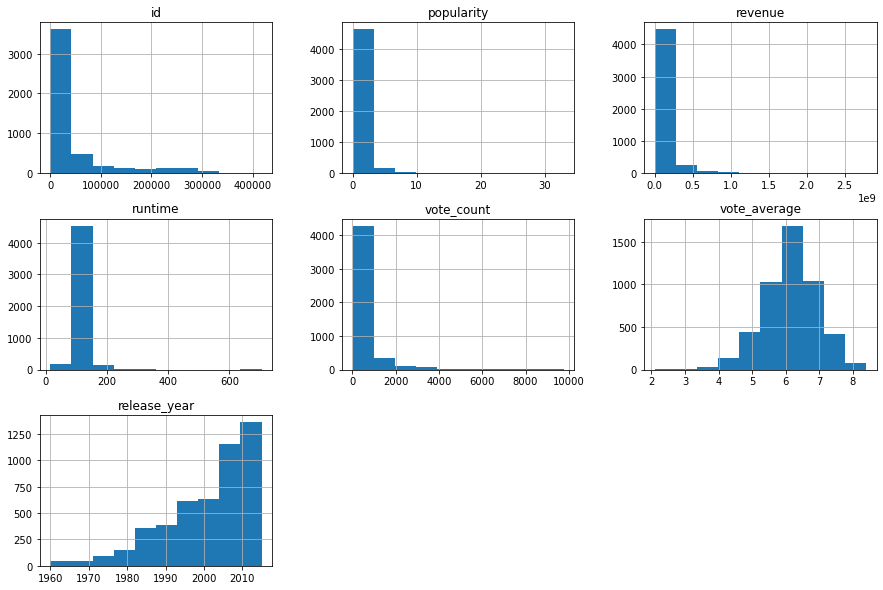

In [28]:
# Looking through the column plots
df.hist(figsize=(15,10));

>Looking through the histogram of variables, i can observe the following variables(id, popularity, revenue, vote count, runtime) are all skewed to the right, release year is skewed to the left and we have a normal distribution for vote average variable.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year? )

In [29]:
# Creating a dataframe with the required columns to make my process faster
df_que1 = df[['genres', 
              'popularity', 
              'release_year']
            ]
df_que1.head(2)

,genres,popularity,release_year
0,Action|Adventure|Science Fiction|Thriller,32.985763,2015
1,Action|Adventure|Science Fiction|Thriller,28.419936,2015


In [30]:
df_que1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        4849 non-null   object 
 1   popularity    4849 non-null   float64
 2   release_year  4849 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 151.5+ KB


> My data contains a column ('genres') with multiple strings, before delving further i would need to split this using the delimiter '|' which is the seperator.

In [31]:
from itertools import chain

# Here i would be getting the list with the '|' seperator
def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

# Checking the number of splits to be made  
lens = df_que1['genres'].str.split('|').map(len)

# Overwriting the old data with the chain and repeat process
df_que1 = pd.DataFrame({'genres': chainer(df_que1['genres']),
                        'release_year': np.repeat(df_que1['release_year'], lens),
                        'popularity': np.repeat(df_que1['popularity'], lens)}
                      )

df_que1.head()

,genres,release_year,popularity
0,Action,2015,32.985763
0,Adventure,2015,32.985763
0,Science Fiction,2015,32.985763
0,Thriller,2015,32.985763
1,Action,2015,28.419936


> Changes have occured in our dataframe, with it's new shape now 12,664 rows and 3 columns.

In [32]:
df_que1.shape

(12664, 3)

In [33]:
# Using the groupy function to group the genres and release year with their counts.
gen_counts = df_que1.groupby(['release_year','genres']).count()
gen_counts

popularity
release_year genres                     
1960         Action                    2
             Adventure                 1
             Comedy                    4
             Drama                     4
             Family                    1
...                                  ...
2015         Romance                  25
             Science Fiction          28
             Thriller                 60
             War                       6
             Western                   3

[882 rows x 1 columns]

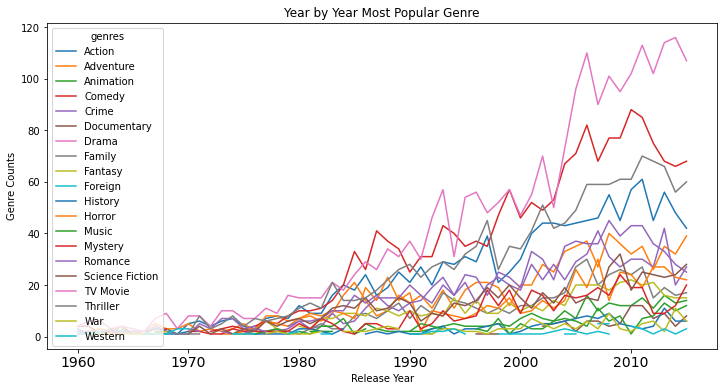

In [34]:
# Would be plotting a data to show the year by year most popular genres using there counts.
fig, ax=plt.subplots(figsize=(12,10))

df_genre = gen_counts['popularity'].unstack().plot(ax=ax, 
                                                   figsize=(12,6)
                                                  )
plt.xticks(fontsize=14);
plt.title("Year by Year Most Popular Genre");
plt.xlabel("Release Year");
plt.ylabel("Genre Counts");

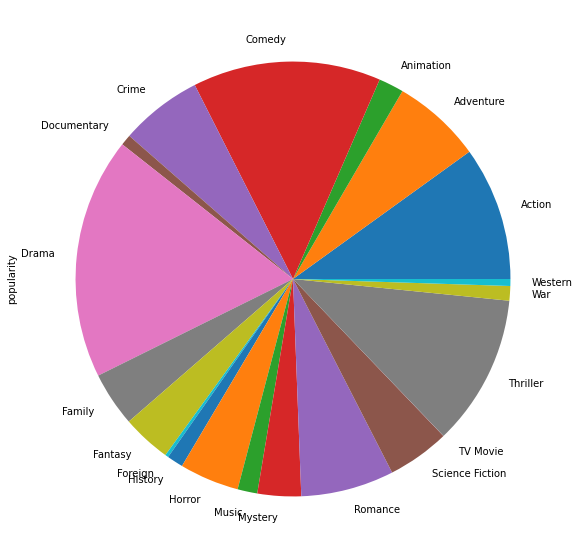

In [35]:
# Getting a pie chart to further tell the colors showing the most popular genres from year to year
df_que1.groupby('genres')['popularity'].count().plot(kind='pie',
                                                     y='popularity', 
                                                     figsize=(10,10)
                                                    );

>From our visualization we can confirm drama, comedy and thriller were popular year by year accompanied by the action genre.

>We can also see a sharp rise in the drama genre from the 20s.

>The comedy genre was the most popular in the 80s and declined slighly in the 90s.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

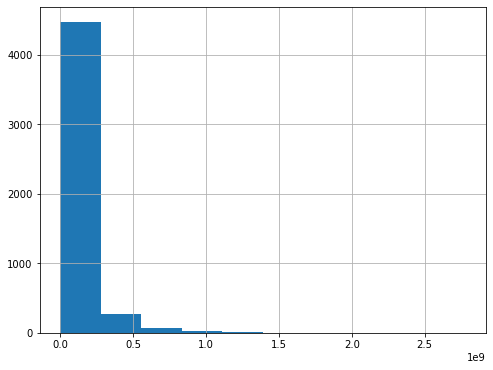

In [36]:
df.revenue.hist(figsize=(8,6));

>From the histogram showcasing the revenue column, i obeserved the revenue column is skewed to the right.

In [37]:
# A look at the stats for the revenue column
df.revenue.describe()

count    4.849000e+03
mean     8.923886e+07
std      1.620801e+08
min      2.000000e+00
25%      7.732325e+06
50%      3.185308e+07
75%      9.996575e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [38]:
# Grouping revenues that are greater that 75% as high revenues
h_rev = df.revenue.quantile(.75)
hr_df= df[df.revenue > h_rev]

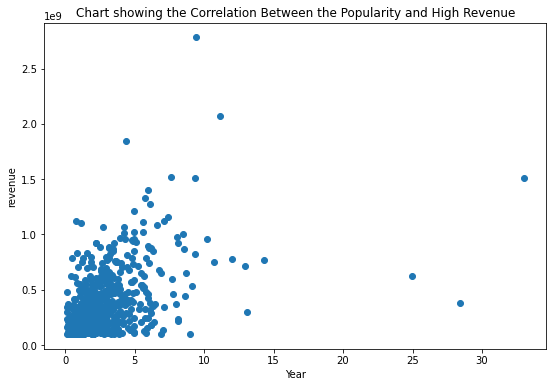

In [39]:
# Plot showing the correlation between popularity and high revenue
plt.subplots(figsize=(9,6))
plt.scatter(x=hr_df.popularity, 
            y=hr_df.revenue
           )
plt.title('Chart showing the Correlation Between the Popularity and High Revenue')
plt.xlabel('Year')
plt.ylabel('revenue');

In [40]:
# Checking the correlation to tell the relationship between both variable
hr_df[['popularity', 
       'revenue']
     ].corr()

,popularity,revenue
popularity,1.000000,0.525258
revenue,0.525258,1.000000


>The popularity variable seems to be more correlated with the revenue variable as its correlation value is high with 0.525258

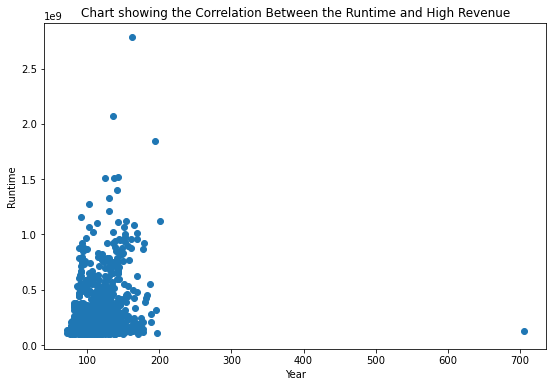

In [41]:
# Plot showing the correlation between runtime and high revenue
plt.subplots(figsize=(9,6))
plt.scatter(x=hr_df.runtime, 
            y=hr_df.revenue
           )
plt.title('Chart showing the Correlation Between the Runtime and High Revenue')
plt.xlabel('Year')
plt.ylabel('Runtime');

In [42]:
# Checking the correlation to tell the correlation both variable
hr_df[['runtime', 'revenue']
     ].corr()

,runtime,revenue
runtime,1.000000,0.187737
revenue,0.187737,1.000000


>The runtime variable with a low correlation value of 0.187737 is less correlated to the revenue

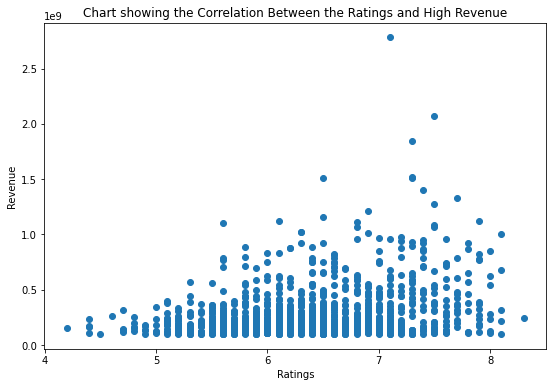

In [43]:
# Plot showing the correlation between vote average(ratings) and high revenue
plt.subplots(figsize=(9,6))
plt.scatter(x=hr_df.vote_average, 
            y=hr_df.revenue
           )
plt.title('Chart showing the Correlation Between the Ratings and High Revenue')
plt.xlabel('Ratings')
plt.ylabel('Revenue');

In [44]:
# Checking the correlation to tell the relationship between both variable
hr_df[['vote_average', 'revenue']
     ].corr()

,vote_average,revenue
vote_average,1.000000,0.272211
revenue,0.272211,1.000000


>The vote average variable with a low correlation value of 0.272211 is less correlated to the revenue

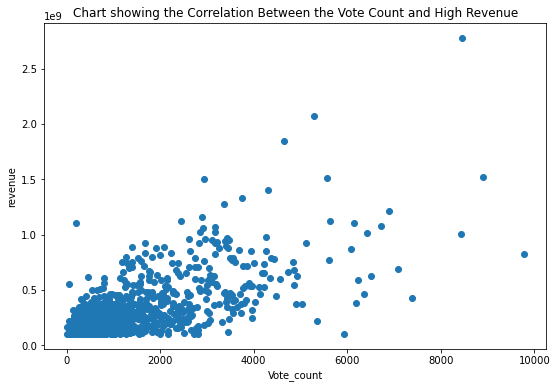

In [45]:
# Plot showing the correlation between vote count and high revenue
plt.subplots(figsize=(9,6))
plt.scatter(x=hr_df.vote_count, 
            y=hr_df.revenue
           )
plt.title('Chart showing the Correlation Between the Vote Count and High Revenue')
plt.xlabel('Vote_count')
plt.ylabel('revenue');

In [46]:
# Checking the correlation to tell the relationship between both variable
hr_df[['vote_count', 'revenue']
     ].corr()

,vote_count,revenue
vote_count,1.000000,0.685933
revenue,0.685933,1.000000


>The vote count variable seems to be the most correlated with the revenue variable as its correlation value is high with 0.685933

<a id='conclusions'></a>
## Conclusions

>In conclusion movies generally, especially the drama, comedy and thriller genres grew drastically from the 90s until now, properties such as the vote counts and popularity tends to bring in more revenues as the association between both properties are greater than 0.5 from our findings and visualization.

>A few limitations where encounted as we had to do away with most of the columns which either an incomplete data with zero values, while others were null, rows were reduced from 10866 rows and 21 colums to 4849 rows and 10 columns. I believe this would affect the result of the data in generalization. 

<a id='refences'></a>
### References
https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe

https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group

https://www.geeksforgeeks.org/how-to-calculate-correlation-between-two-columns-in-pandas/
